#### Ailerons Model Prediction

#### Importing Libraries

#### Problem Statement:- To Predict the Control Action "goal" based on f16 Aircraft airplane Status features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from math import sqrt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

C:\Users\nsidd\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\nsidd\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\nsidd\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\nsidd\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)

Bad key text.latex.unicode in file C:\Users\nsidd\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file C:\Users\nsidd\Anaconda3\lib\site-packages\matplotlib\mp

#### Importing Dataset

#### Exploaratory Data Analysis

In [355]:
df = pd.read_csv("ailerons_train.csv")
df.head() #Top 5 Rows

climbRate  Sgz     p     q  curPitch  curRoll  absRoll  diffClb  \
0          2  -56 -0.33 -0.09      0.90      0.2      -11       12   
1        470  -39  0.02  0.12      0.39     -0.6      -12        8   
2        165    4  0.14  0.14      0.78      0.4      -11       -9   
3       -113    5 -0.12  0.11      1.06      0.6      -10       -7   
4       -411  -21 -0.17  0.07      1.33     -0.6      -11        0   

   diffRollRate  diffDiffClb  ...  diffSeTime8  diffSeTime9  diffSeTime10  \
0         0.004         -0.1  ...          0.0          0.0           0.0   
1         0.009         -1.6  ...          0.0          0.0           0.0   
2        -0.003         -0.2  ...          0.0          0.0           0.0   
3        -0.008          0.0  ...          0.0          0.0           0.0   
4         0.002          0.1  ...          0.0          0.0           0.0   

   diffSeTime11  diffSeTime12  diffSeTime13  diffSeTime14  alpha     Se  \
0           0.0           0.0         0.000           0.0    0.9  0.032   
1           0.0           0.0         0.000           0.0    0.9  0.034   
2           0.0           0.0         0.000           0.0    1.0  0.034   
3           0.0           0.0         0.000           0.0    0.9  0.033   
4           0.0           0.0        -0.002           0.0    0.9  0.032   

     goal  
0 -0.0009  
1 -0.0011  
2 -0.0012  
3 -0.0011  
4 -0.0008  

[5 rows x 41 columns]

In [356]:
df1 = df.copy()

In [357]:
# datatypes 
df.dtypes

climbRate         int64
Sgz               int64
p               float64
q               float64
curPitch        float64
curRoll         float64
absRoll           int64
diffClb           int64
diffRollRate    float64
diffDiffClb     float64
SeTime1         float64
SeTime2         float64
SeTime3         float64
SeTime4         float64
SeTime5         float64
SeTime6         float64
SeTime7         float64
SeTime8         float64
SeTime9         float64
SeTime10        float64
SeTime11        float64
SeTime12        float64
SeTime13        float64
SeTime14        float64
diffSeTime1     float64
diffSeTime2     float64
diffSeTime3     float64
diffSeTime4     float64
diffSeTime5     float64
diffSeTime6     float64
diffSeTime7     float64
diffSeTime8     float64
diffSeTime9     float64
diffSeTime10    float64
diffSeTime11    float64
diffSeTime12    float64
diffSeTime13    float64
diffSeTime14    float64
alpha           float64
Se              float64
goal            float64
dtype: object

In [358]:
#No Missing Values :)
df.isnull().sum()

climbRate       0
Sgz             0
p               0
q               0
curPitch        0
curRoll         0
absRoll         0
diffClb         0
diffRollRate    0
diffDiffClb     0
SeTime1         0
SeTime2         0
SeTime3         0
SeTime4         0
SeTime5         0
SeTime6         0
SeTime7         0
SeTime8         0
SeTime9         0
SeTime10        0
SeTime11        0
SeTime12        0
SeTime13        0
SeTime14        0
diffSeTime1     0
diffSeTime2     0
diffSeTime3     0
diffSeTime4     0
diffSeTime5     0
diffSeTime6     0
diffSeTime7     0
diffSeTime8     0
diffSeTime9     0
diffSeTime10    0
diffSeTime11    0
diffSeTime12    0
diffSeTime13    0
diffSeTime14    0
alpha           0
Se              0
goal            0
dtype: int64

In [359]:
df.head()

climbRate  Sgz     p     q  curPitch  curRoll  absRoll  diffClb  \
0          2  -56 -0.33 -0.09      0.90      0.2      -11       12   
1        470  -39  0.02  0.12      0.39     -0.6      -12        8   
2        165    4  0.14  0.14      0.78      0.4      -11       -9   
3       -113    5 -0.12  0.11      1.06      0.6      -10       -7   
4       -411  -21 -0.17  0.07      1.33     -0.6      -11        0   

   diffRollRate  diffDiffClb  ...  diffSeTime8  diffSeTime9  diffSeTime10  \
0         0.004         -0.1  ...          0.0          0.0           0.0   
1         0.009         -1.6  ...          0.0          0.0           0.0   
2        -0.003         -0.2  ...          0.0          0.0           0.0   
3        -0.008          0.0  ...          0.0          0.0           0.0   
4         0.002          0.1  ...          0.0          0.0           0.0   

   diffSeTime11  diffSeTime12  diffSeTime13  diffSeTime14  alpha     Se  \
0           0.0           0.0         0.000           0.0    0.9  0.032   
1           0.0           0.0         0.000           0.0    0.9  0.034   
2           0.0           0.0         0.000           0.0    1.0  0.034   
3           0.0           0.0         0.000           0.0    0.9  0.033   
4           0.0           0.0        -0.002           0.0    0.9  0.032   

     goal  
0 -0.0009  
1 -0.0011  
2 -0.0012  
3 -0.0011  
4 -0.0008  

[5 rows x 41 columns]

In [360]:
#Correlation Matrix
corr = df.corr()

In [361]:
corr

climbRate       Sgz         p         q  curPitch   curRoll  \
climbRate      1.000000 -0.004769  0.162379  0.093983 -0.790573 -0.122171   
Sgz           -0.004769  1.000000  0.060038  0.339946 -0.002966 -0.000332   
p              0.162379  0.060038  1.000000  0.112880 -0.122564 -0.034589   
q              0.093983  0.339946  0.112880  1.000000  0.142712  0.035692   
curPitch      -0.790573 -0.002966 -0.122564  0.142712  1.000000  0.079088   
curRoll       -0.122171 -0.000332 -0.034589  0.035692  0.079088  1.000000   
absRoll       -0.037557  0.087779 -0.020300 -0.386417 -0.160461  0.208059   
diffClb        0.074529 -0.447481 -0.080816 -0.774364 -0.189940 -0.157744   
diffRollRate   0.159539 -0.051378  0.140791 -0.194475 -0.142244 -0.670810   
diffDiffClb   -0.330871 -0.015052 -0.123676 -0.436004  0.234823  0.028178   
SeTime1        0.094530 -0.003635  0.029970  0.346914  0.519697 -0.045408   
SeTime2        0.080349  0.002278  0.033051  0.362780  0.532706 -0.041174   
SeTime3        0.080376  0.002269  0.033066  0.362783  0.532677 -0.041179   
SeTime4        0.073132  0.005068  0.033664  0.369841  0.539249 -0.038618   
SeTime5        0.073157  0.005074  0.033690  0.369943  0.539224 -0.038608   
SeTime6        0.064980  0.006640  0.031011  0.376286  0.546932 -0.036429   
SeTime7        0.064934  0.006624  0.030899  0.376355  0.546976 -0.036389   
SeTime8        0.052460  0.006360  0.025836  0.384132  0.558616 -0.033627   
SeTime9        0.052458  0.006393  0.025864  0.384147  0.558620 -0.033635   
SeTime10       0.036596  0.006609  0.021172  0.394224  0.573154 -0.030203   
SeTime11       0.036386  0.006694  0.021109  0.394398  0.573395 -0.030029   
SeTime12       0.017863  0.006913  0.016016  0.403464  0.590264 -0.027976   
SeTime13       0.017749  0.006937  0.015966  0.403627  0.590389 -0.027969   
SeTime14      -0.000394  0.007019  0.009815  0.408569  0.606253 -0.025514   
diffSeTime1    0.196165 -0.082206 -0.001668 -0.204338 -0.187568 -0.060046   
diffSeTime2   -0.006598  0.002483  0.012967 -0.006473  0.004095 -0.005274   
diffSeTime3    0.153262 -0.054631  0.006870 -0.139101 -0.136680 -0.052665   
diffSeTime4    0.001699 -0.005471  0.016403 -0.025998 -0.002175 -0.009335   
diffSeTime5    0.160262 -0.020507  0.071729 -0.126703 -0.161417 -0.043333   
diffSeTime6    0.008739  0.007679  0.033497 -0.025477 -0.028287 -0.010811   
diffSeTime7    0.214631  0.011638  0.105809 -0.136951 -0.205179 -0.046928   
diffSeTime8    0.006426 -0.014155 -0.008157 -0.015643 -0.003685  0.001319   
diffSeTime9    0.242695  0.010022  0.092941 -0.159573 -0.233430 -0.046755   
diffSeTime10   0.022704 -0.007799  0.015410 -0.023730 -0.036321 -0.018493   
diffSeTime11   0.274342  0.008539  0.096137 -0.142138 -0.260085 -0.025538   
diffSeTime12   0.014947 -0.005416  0.019553 -0.034909 -0.029125 -0.002668   
diffSeTime13   0.272714  0.018485  0.111082 -0.078019 -0.245107 -0.030619   
diffSeTime14   0.005222 -0.000763  0.015690 -0.019279 -0.027878 -0.003854   
alpha         -0.011497 -0.012498  0.001767  0.348660  0.610813 -0.023865   
Se            -0.000421  0.007036  0.009811  0.408586  0.606279 -0.025510   
goal          -0.077366  0.078725 -0.322841 -0.383138 -0.306602 -0.097322   

                   absRoll   diffClb  diffRollRate  diffDiffClb  ...  \
climbRate    -3.755702e-02  0.074529      0.159539    -0.330871  ...   
Sgz           8.777852e-02 -0.447481     -0.051378    -0.015052  ...   
p            -2.029987e-02 -0.080816      0.140791    -0.123676  ...   
q            -3.864172e-01 -0.774364     -0.194475    -0.436004  ...   
curPitch     -1.604610e-01 -0.189940     -0.142244     0.234823  ...   
curRoll       2.080591e-01 -0.157744     -0.670810     0.028178  ...   
absRoll       1.000000e+00 -0.038985     -0.178391     0.003691  ...   
diffClb      -3.898536e-02  1.000000      0.329807     0.043486  ...   
diffRollRate -1.783912e-01  0.329807      1.000000    -0.003601  ...   
diffDiffClb   3.690861e-03  0.043486     -0.003601     1.00

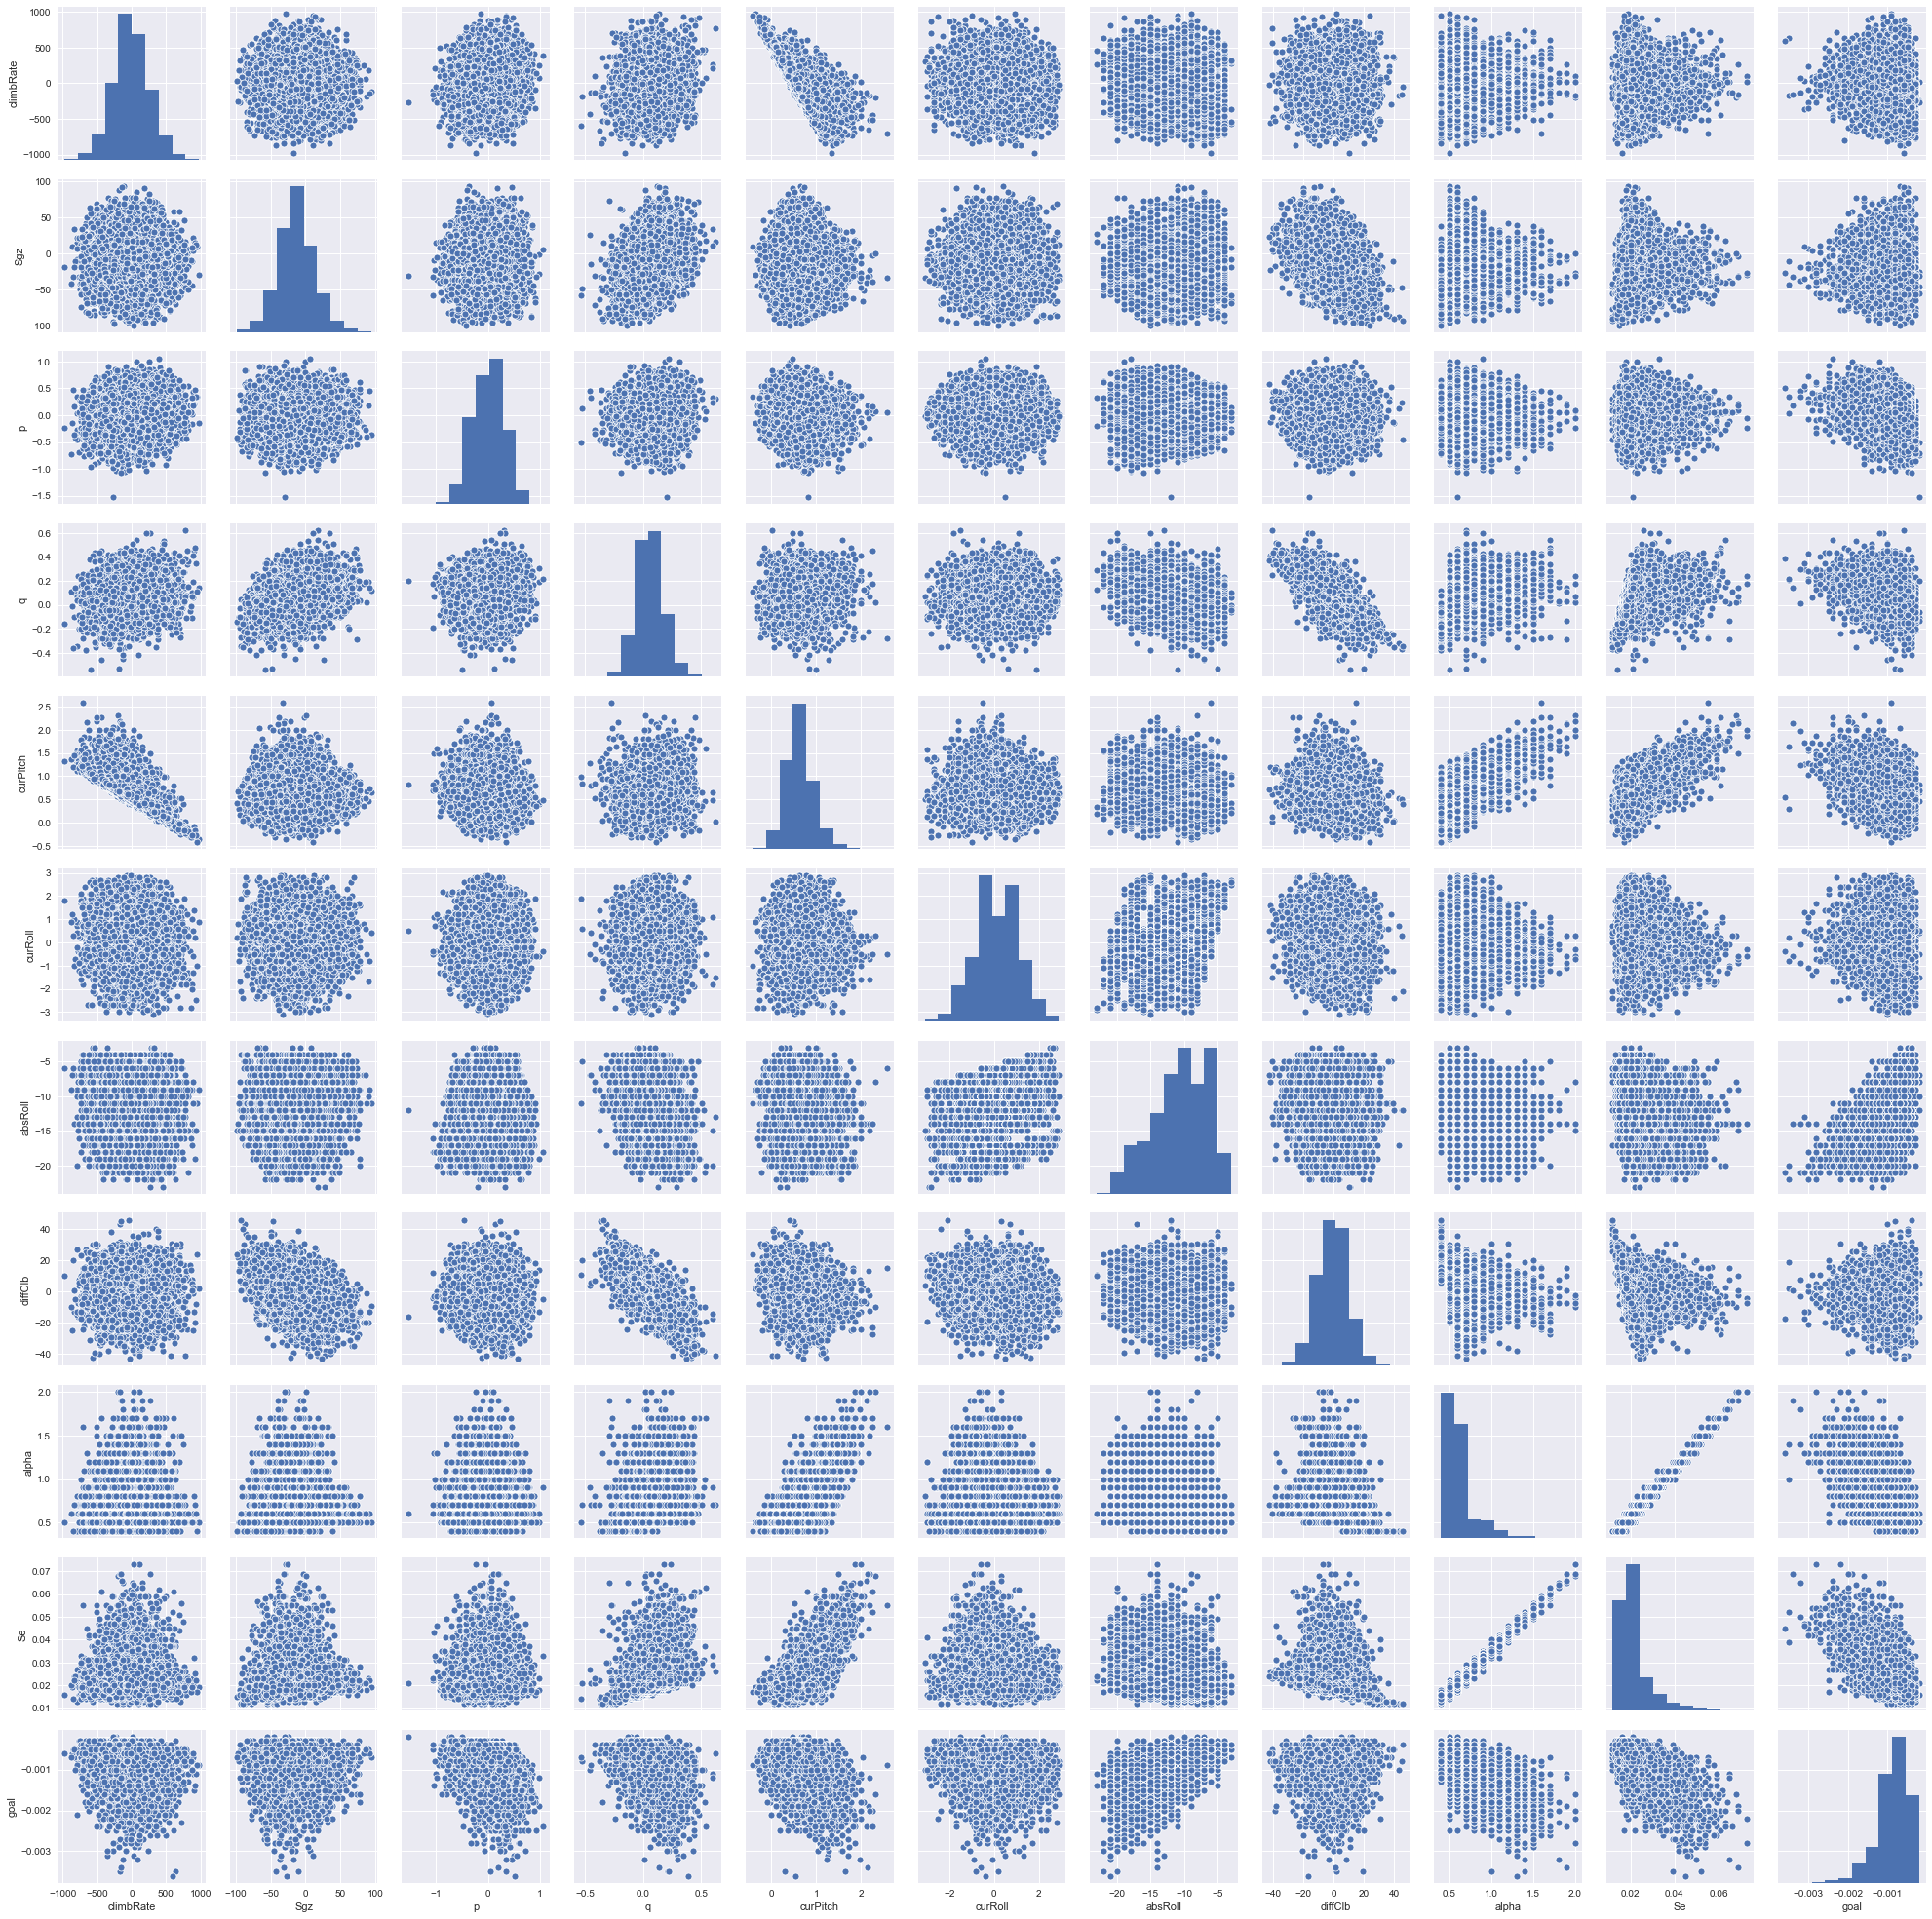

In [362]:
#pairplot on few variables
cols = ['climbRate', 'Sgz', 'p','q','curPitch','curRoll','absRoll','diffClb', 'alpha', 'Se', 'goal']
sns.pairplot(df[cols]) 

<AxesSubplot:xlabel='climbRate'>

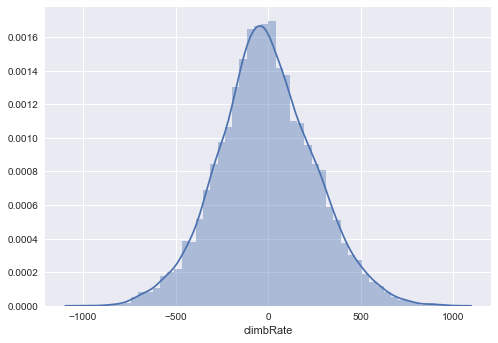

In [363]:
sns.distplot(df['climbRate'])

In [364]:
correlation = df.corr()

<AxesSubplot:>

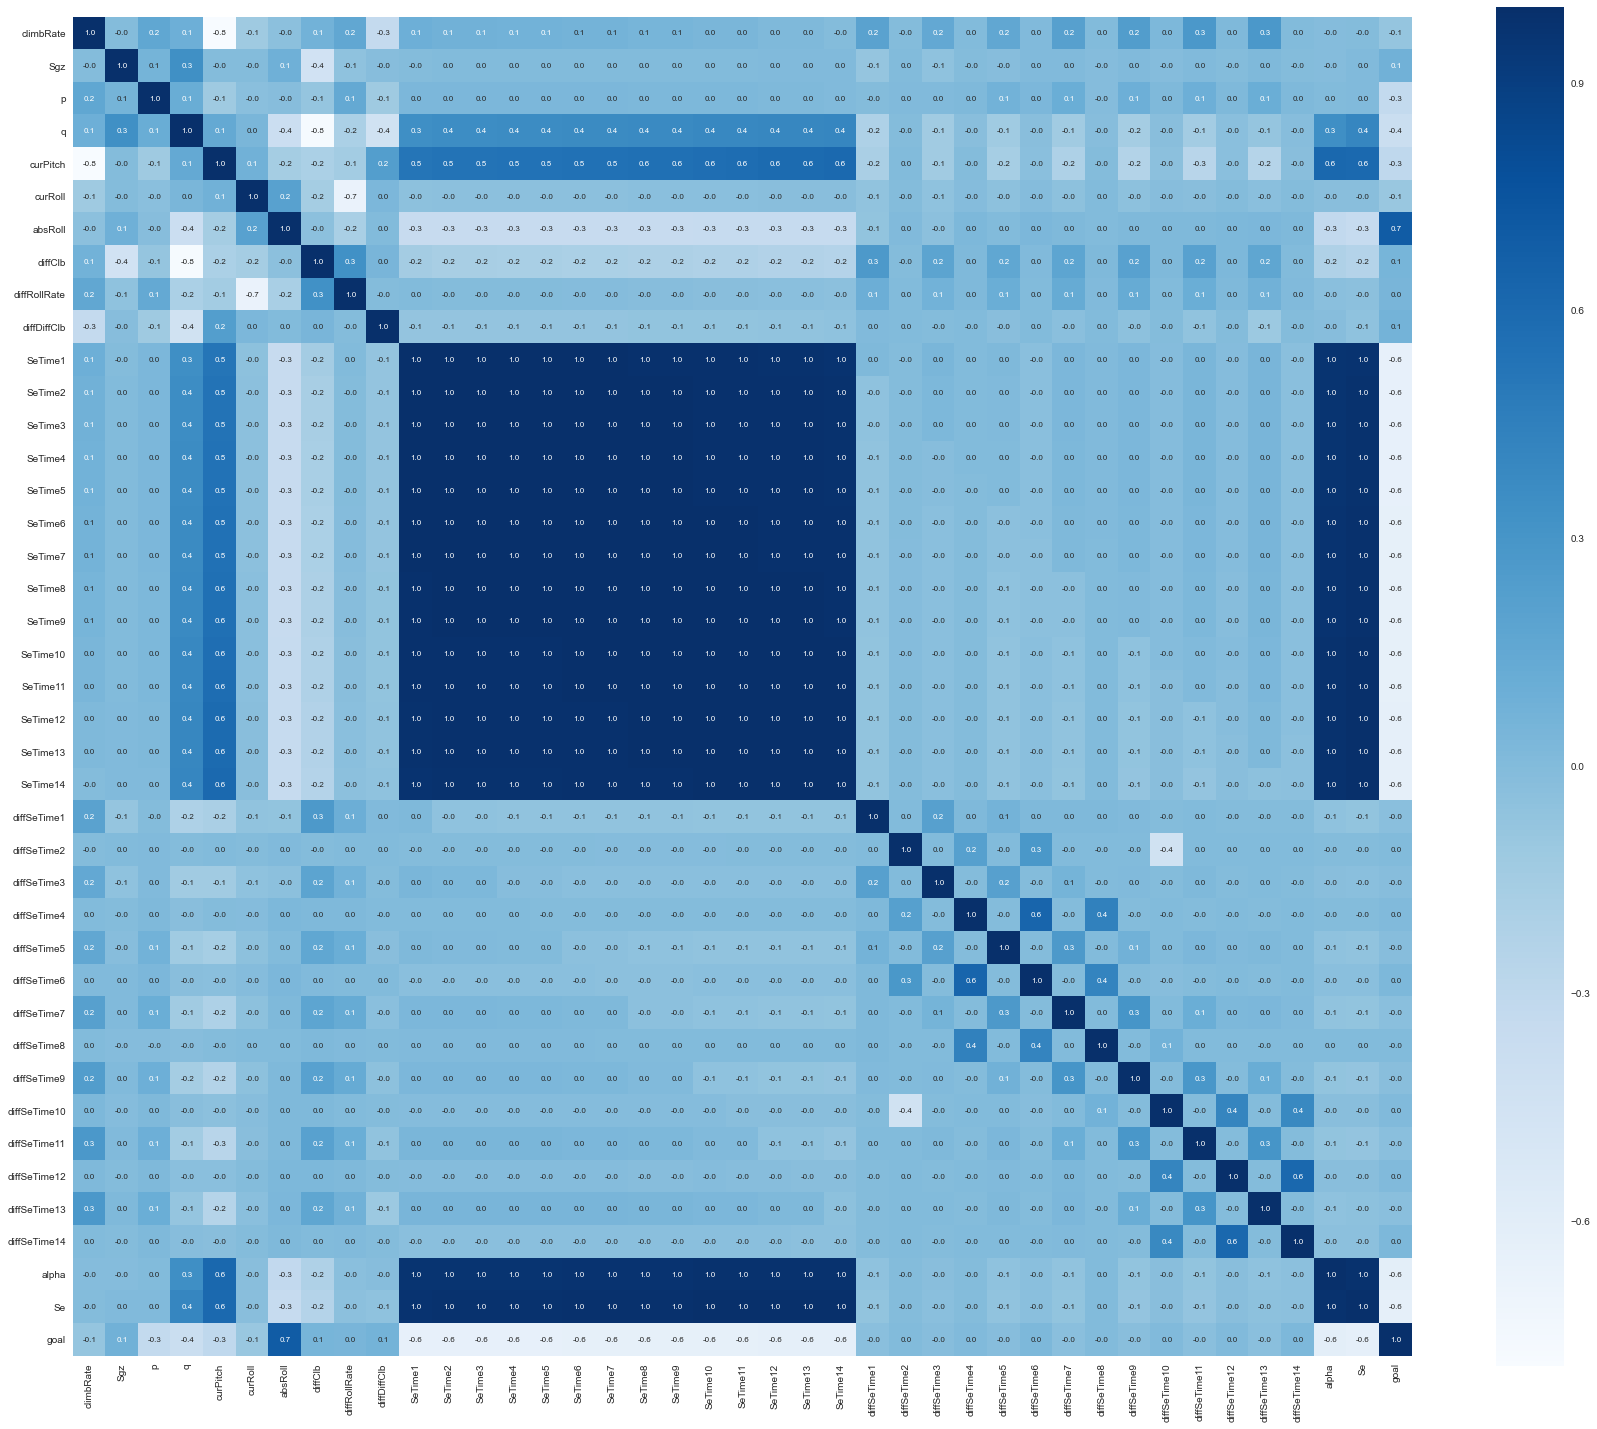

In [365]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(30,25))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

#### Most of the Features, don't have a positive relation with Target "Goal"

In [1153]:
df.head()

climbRate  Sgz     p     q  curPitch  curRoll  absRoll  diffClb  \
0          2  -56 -0.33 -0.09      0.90      0.2      -11       12   
1        470  -39  0.02  0.12      0.39     -0.6      -12        8   
2        165    4  0.14  0.14      0.78      0.4      -11       -9   
3       -113    5 -0.12  0.11      1.06      0.6      -10       -7   
4       -411  -21 -0.17  0.07      1.33     -0.6      -11        0   

   diffRollRate  diffDiffClb  ...  diffSeTime8  diffSeTime9  diffSeTime10  \
0         0.004         -0.1  ...          0.0          0.0           0.0   
1         0.009         -1.6  ...          0.0          0.0           0.0   
2        -0.003         -0.2  ...          0.0          0.0           0.0   
3        -0.008          0.0  ...          0.0          0.0           0.0   
4         0.002          0.1  ...          0.0          0.0           0.0   

   diffSeTime11  diffSeTime12  diffSeTime13  diffSeTime14  alpha     Se  \
0           0.0           0.0         0.000           0.0    0.9  0.032   
1           0.0           0.0         0.000           0.0    0.9  0.034   
2           0.0           0.0         0.000           0.0    1.0  0.034   
3           0.0           0.0         0.000           0.0    0.9  0.033   
4           0.0           0.0        -0.002           0.0    0.9  0.032   

     goal  
0 -0.0009  
1 -0.0011  
2 -0.0012  
3 -0.0011  
4 -0.0008  

[5 rows x 41 columns]

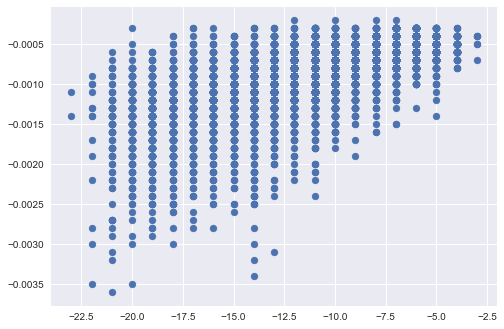

In [1162]:
plt.scatter(x=df['absRoll'],y=df['goal'])

#### AbsRoll & Goal have a positive correlation of 70%.

#### Initially, I tried building the model using all features with different ML/DL models.

#### Model Building

#### PART-1

In [367]:
#Separating Target Variable and Features
X = df.drop(['goal'], axis=1)
Y = df['goal']

In [368]:
X

climbRate  Sgz     p     q  curPitch  curRoll  absRoll  diffClb  \
0              2  -56 -0.33 -0.09      0.90      0.2      -11       12   
1            470  -39  0.02  0.12      0.39     -0.6      -12        8   
2            165    4  0.14  0.14      0.78      0.4      -11       -9   
3           -113    5 -0.12  0.11      1.06      0.6      -10       -7   
4           -411  -21 -0.17  0.07      1.33     -0.6      -11        0   
...          ...  ...   ...   ...       ...      ...      ...      ...   
12245        448   39  0.21  0.05      0.14     -0.5       -8       -4   
12246        179   64  0.06  0.17      0.41      0.5       -8       -9   
12247         65   66 -0.03  0.14      0.54      0.5       -7      -17   
12248        -22   66 -0.08  0.23      0.61      0.5       -8      -15   
12249        -59   47 -0.04  0.07      0.61     -0.7       -9       -7   

       diffRollRate  diffDiffClb  ...  diffSeTime7  diffSeTime8  diffSeTime9  \
0             0.004         -0.1  ...          0.0          0.0        0.000   
1             0.009         -1.6  ...          0.0          0.0        0.000   
2            -0.003         -0.2  ...          0.0          0.0        0.000   
3            -0.008          0.0  ...          0.0          0.0        0.000   
4             0.002          0.1  ...          0.0          0.0        0.000   
...             ...          ...  ...          ...          ...          ...   
12245         0.009         -0.1  ...          0.0          0.0        0.000   
12246        -0.010         -0.6  ...          0.0          0.0        0.000   
12247        -0.010          0.4  ...          0.0          0.0        0.001   
12248        -0.010         -0.6  ...          0.0          0.0        0.000   
12249         0.004          0.2  ...          0.0          0.0        0.000   

       diffSeTime10  diffSeTime11  diffSeTime12  diffSeTime13  diffSeTime14  \
0               0.0           0.0           0.0         0.000           0.0   
1               0.0           0.0           0.0         0.000           0.0   
2               0.0           0.0           0.0         0.000           0.0   
3               0.0           0.0           0.0         0.000           0.0   
4               0.0           0.0           0.0        -0.002           0.0   
...             ...           ...           ...           ...           ...   
12245           0.0           0.0           0.0         0.000           0.0   
12246           0.0           0.0           0.0         0.000           0.0   
12247           0.0           0.0           0.0         0.000           0.0   
12248           0.0           0.0           0.0         0.000           0.0   
12249           0.0           0.0           0.0         0.000           0.0   

       alpha     Se  
0        0.9  0.032  
1        0.9  0.034  
2        1.0  0.034  
3        0.9  0.033  
4        0.9  0.032  
...      ...    ...  
12245    0.5  0.019  
12246    0.6  0.021  
12247    0.6  0.021  
12248    0.6  0.022  
12249    0.6  0.020  

[12250 rows x 40 columns]

In [369]:
Y

0       -0.0009
1       -0.0011
2       -0.0012
3       -0.0011
4       -0.0008
          ...  
12245   -0.0007
12246   -0.0008
12247   -0.0007
12248   -0.0006
12249   -0.0004
Name: goal, Length: 12250, dtype: float64

In [370]:
#test-size of 20%
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state= 2)
print(X.shape, X_train.shape, Y_train.shape, X_test.shape,Y_test.shape)

(12250, 40) (9800, 40) (9800,) (2450, 40) (2450,)


#### Data Pre-Processing

In [371]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =  scaler.fit_transform(X_test)

#### 1. Linear Regression

In [1112]:
lr = LinearRegression()
lr.fit(X_train_scaled,Y_train)

LinearRegression()

In [1113]:
# accuracy for prediction on training data
lrprediction = lr.predict(X_test_scaled)
print(lrprediction)

[-0.00046704 -0.00075988 -0.00126914 ... -0.00052787 -0.00117216
 -0.00044739]


In [1114]:
# R squared error
r2_lr = metrics.r2_score(Y_test, lrprediction)

rms_lr = sqrt(metrics.mean_squared_error(Y_test, lrprediction))

print("R squared Value for Linear Regression :- ", r2_lr)
print('RMSE for Linear Regression : ', rms_lr)

R squared Value for Linear Regression :-  0.8097652694752668
RMSE for Linear Regression :  0.0001781563534638777


##### For test data, R Squared Error acheived is 80.9% which is good score
##### RMSE Value acheived is 0.00017. Lower the value of RMSE better the fit

#### 2. Decision Tree

In [1116]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree

DecisionTreeRegressor()

In [1117]:
dtree.fit(X_train_scaled,Y_train)

DecisionTreeRegressor()

In [1118]:
dtree_pred = dtree.predict(X_test_scaled)

In [1119]:
# R squared error
r2_dtree = metrics.r2_score(Y_test, dtree_pred)

rms_dtree = sqrt(metrics.mean_squared_error(Y_test, dtree_pred))

print("R squared Value for Decision Tree : ", r2_dtree)
print('RMSE for Decision Tree: ', rms_dtree)

R squared Value for Decision Tree :  0.691880442692049
RMSE for Decision Tree:  0.00022673368357018796


#### 3. Random Forrest

In [1120]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(X_train_scaled, Y_train)

RandomForestRegressor()

In [1121]:
rf_test = rf.predict(X_test_scaled)
print(rf_test)

[-0.000516 -0.000684 -0.001135 ... -0.000508 -0.001243 -0.000469]


In [1122]:
# R squared error
r2_rf = metrics.r2_score(Y_test, rf_test)

rms_rf = sqrt(metrics.mean_squared_error(Y_test, rf_test))

print("R squared Value for Random Forrest : ", r2_rf)
print('RMSE Value for Random Forrest : ', rms_rf)

R squared Value for Random Forrest :  0.8333484233058617
RMSE Value for Random Forrest :  0.0001667481884979472


#### 4. XGBoost

In [1123]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train_scaled, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [1124]:
xgb_test = xgb.predict(X_test_scaled)
print(xgb_test)

[-0.00052732 -0.0005765  -0.00124347 ... -0.00052768 -0.00120604
 -0.00044638]


In [1125]:
# R squared error
r2_xg = metrics.r2_score(Y_test, xgb_test)

rms_xg = sqrt(metrics.mean_squared_error(Y_test, xgb_test))

print("R squared Value for XGBoost: ", r2_xg)
print('RMSE Value for XGBoost : ', rms_xg)

R squared Value for XGBoost:  0.8221159981419033
RMSE Value for XGBoost :  0.00017227603063061023


#### 5. LightGBM

In [1126]:
import lightgbm as lgb
lgb = lgb.LGBMRegressor()

In [1127]:
lgb.fit(X_train_scaled,Y_train)

LGBMRegressor()

In [1128]:
lgb_pred = lgb.predict(X_test_scaled)

In [1129]:
lgb_pred

array([-0.00054366, -0.00070994, -0.00110058, ..., -0.00049305,
       -0.00111673, -0.00049839])

In [1130]:
print("R2-Score Value for Light GBM",metrics.r2_score(Y_test, lgb_pred))
print("RMSE Value for Light GBM:",np.sqrt(metrics.mean_squared_error(Y_test,lgb_pred)))

R2-Score Value for Light GBM 0.8398400631542381
RMSE Value for Light GBM: 0.00016346822825744805


#### 6. Neural Network

In [1131]:
# NN
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.layers import Dropout

In [1132]:
df.shape

(12250, 41)

In [1133]:
callback = EarlyStopping(monitor = "loss",patience = 5)

In [1135]:
model = Sequential()
model.add(Dense(units = 32, input_dim = 40, activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(units = 32, activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(units = 32, activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(units = 32, activation="tanh"))
model.add(Dense(1))
model.compile(loss = MeanSquaredError(reduction="auto", name="mean_squared_error"), optimizer = "adam", metrics= [RootMeanSquaredError()])
model.fit(X_train_scaled, Y_train,batch_size = 25, epochs = 100,callbacks=[callbacks],steps_per_epoch = 300)

Epoch 1/100
300/300 [==============================] - 14s 48ms/step - loss: 0.0133 - root_mean_squared_error: 0.1154
Epoch 2/100
300/300 [==============================] - 16s 52ms/step - loss: 2.7020e-04 - root_mean_squared_error: 0.0164 2s - loss: 2.8757e-04 - r
Epoch 3/100
300/300 [==============================] - 14s 48ms/step - loss: 1.2889e-04 - root_mean_squared_error: 0.0114
Epoch 4/100
300/300 [==============================] - 14s 48ms/step - loss: 7.7352e-05 - root_mean_squared_error: 0.0088
Epoch 5/100
300/300 [==============================] - 14s 45ms/step - loss: 5.1483e-05 - root_mean_squared_error: 0.0072
Epoch 6/100
300/300 [==============================] - 13s 44ms/step - loss: 3.6292e-05 - root_mean_squared_error: 0.0060
Epoch 7/100
300/300 [==============================] - 13s 44ms/step - loss: 2.6530e-05 - root_mean_squared_error: 0.0052
Epoch 8/100
300/300 [==============================] - 15s 49ms/step - loss: 2.0079e-05 - root_mean_squared_error: 0.0045
Ep

In [1136]:
model.evaluate(X_test_scaled, Y_test, batch_size=10, steps=15)

15/15 [==============================] - 1s 55ms/step - loss: 4.2421e-08 - root_mean_squared_error: 2.0596e-04


[4.242121320885417e-08, 0.00020596411]

#### 7. ExtraTressRegressor

In [1137]:
from sklearn.ensemble import ExtraTreesRegressor
ext=ExtraTreesRegressor()
ext.fit(X_train_scaled,Y_train)

ExtraTreesRegressor()

In [1138]:
ext_pred = ext.predict(X_test_scaled)

In [1139]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y1_test,ext_pred)))
print("R2-Score Extratrees",metrics.r2_score(Y1_test, ext_pred))

RMSE: 0.0001685118841566992
R2-Score Extratrees 0.8298044319130693


|Model Name|R2- Squared|RMSE|
|----------|--------------|------|
|1. Linear Regression|0.8097|0.000178|
|2. Decision Tree|0.6882|0.000228|
|3. Random Forrest|0.8327|0.000167|
|4. XGBoost|0.8221|0.0001722|
|5. LightGBM|0.8398|0.000163|
|6. Neural Network|4.24e-08(MSE)|0.000205|
|7. ExtraTreesRegressor|0.8298|0.000168|

#### After Trying these above mentioned models, I have got a good R-Square Value for Light GBM model with 83.98% and 0.000163 RMSE Value. 

#### In General, higher the R-Squared Value, lower the RMSE Value Indicates a better fit for the model

#### To Conclude, Light GBM Model performed well to predict the Target.

#### Now I applied Hyperparameters using GridSearch CV. Let's check the results.

In [1140]:
df.head()

climbRate  Sgz     p     q  curPitch  curRoll  absRoll  diffClb  \
0          2  -56 -0.33 -0.09      0.90      0.2      -11       12   
1        470  -39  0.02  0.12      0.39     -0.6      -12        8   
2        165    4  0.14  0.14      0.78      0.4      -11       -9   
3       -113    5 -0.12  0.11      1.06      0.6      -10       -7   
4       -411  -21 -0.17  0.07      1.33     -0.6      -11        0   

   diffRollRate  diffDiffClb  ...  diffSeTime8  diffSeTime9  diffSeTime10  \
0         0.004         -0.1  ...          0.0          0.0           0.0   
1         0.009         -1.6  ...          0.0          0.0           0.0   
2        -0.003         -0.2  ...          0.0          0.0           0.0   
3        -0.008          0.0  ...          0.0          0.0           0.0   
4         0.002          0.1  ...          0.0          0.0           0.0   

   diffSeTime11  diffSeTime12  diffSeTime13  diffSeTime14  alpha     Se  \
0           0.0           0.0         0.000           0.0    0.9  0.032   
1           0.0           0.0         0.000           0.0    0.9  0.034   
2           0.0           0.0         0.000           0.0    1.0  0.034   
3           0.0           0.0         0.000           0.0    0.9  0.033   
4           0.0           0.0        -0.002           0.0    0.9  0.032   

     goal  
0 -0.0009  
1 -0.0011  
2 -0.0012  
3 -0.0011  
4 -0.0008  

[5 rows x 41 columns]

#### Applying GridSearchCV to find HyperParameters

#### PART-2

#### 1. Linear Regression 

In [943]:
lr_grid = LinearRegression()
lr_grid.fit(X_train_scaled,Y_train)

LinearRegression()

In [944]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.metrics import r2_score

#### Passed these parameters into GridSearchCV

In [945]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [946]:
grid = GridSearchCV(lr_grid, parameters, cv= 5, scoring = "neg_root_mean_squared_error")
grid.fit(X_train_scaled,Y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='neg_root_mean_squared_error')

In [947]:
grid.best_params_

{'copy_X': True, 'fit_intercept': False, 'normalize': True}

In [948]:
lr_grid = LinearRegression(copy_X=True, fit_intercept=False, normalize=True, n_jobs=-1)
lr_grid.fit(X_train_scaled,Y_train)

LinearRegression(fit_intercept=False, n_jobs=-1, normalize=True)

In [1141]:
# accuracy for prediction on training data
lrprediction_grid = lr_grid.predict(X_test_scaled)
print(lrprediction_grid)

[ 0.00040221  0.00010938 -0.00039988 ...  0.00034138 -0.0003029
  0.00042186]


In [1142]:
# R squared error
r2_lr_grid = metrics.r2_score(Y_test, lrprediction_grid)

rms_lr_grid = sqrt(metrics.mean_squared_error(Y_test, lrprediction_grid))

print("R squared error : ", r2_lr_grid)

print('RMSE test : ', rms_lr_grid)

R squared error :  -3.8331069310921873
RMSE test :  0.0008979860975807571


#### 2. Decision Tree

In [952]:
from sklearn.model_selection import RandomizedSearchCV

In [959]:
from sklearn.tree import DecisionTreeRegressor
dtree_grid= DecisionTreeRegressor()
dtree_grid

DecisionTreeRegressor()

In [960]:
parameters={"criterion":['mse','mae'],'splitter':['best','random'], "min_samples_split":[1,3,5,7,9],
    "min_samples_leaf":[1,3,5,7],
    'max_features':['int','sqrt','log2']}

In [961]:
gridtree = GridSearchCV(dtree_grid, parameters, cv= None)
gridtree.fit(X_train_scaled,Y_train)

C:\Users\nsidd\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nsidd\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nsidd\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\nsidd\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\nsidd\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['int', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [1, 3, 5, 7, 9],
                         'splitter': ['best', 'random']})

In [962]:
gridtree.best_params_

{'criterion': 'mse',
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 9,
 'splitter': 'best'}

In [964]:
gridtree.best_score_

0.6459593111209354

In [965]:
from sklearn.tree import DecisionTreeRegressor
gridtree = DecisionTreeRegressor(criterion="mse",
 max_features="sqrt",
 min_samples_leaf=3,
 min_samples_split=9,
 splitter="best")
gridtree

DecisionTreeRegressor(max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=9)

In [966]:
gridtree.fit(X_train_scaled,Y_train)

DecisionTreeRegressor(max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=9)

In [967]:
dtree_pred = gridtree.predict(X_test_scaled)

In [968]:
# R squared error
r2_dtree = metrics.r2_score(Y_test, dtree_pred)

rms_dtree = sqrt(metrics.mean_squared_error(Y_test, dtree_pred))

print("R squared error : ", r2_dtree)

print('RMSE test : ', rms_dtree)

R squared error :  0.5643742272045824
RMSE test :  0.00026959584467667135


#### 3. XGBOOST Regressor

In [969]:
parameters={"booster":['gbtree','gblinear'], "min_child_weight":[1,3,5,7,9],
    "max_depth":[1,2,3,4,5,6]
    }

In [970]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train_scaled, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [971]:
xgb_test = xgb.predict(X_test_scaled)
print(xgb_test)

[-0.00052732 -0.0005765  -0.00124347 ... -0.00052768 -0.00120604
 -0.00044638]


In [972]:
grid_xg = GridSearchCV(xgb, parameters, cv= None)
grid_xg.fit(X_train_scaled,Y_train)

[14:39:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:39:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  pa

GridSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=0,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             param_grid={

In [973]:
grid_xg.best_params_

{'booster': 'gbtree', 'max_depth': 6, 'min_child_weight': 5}

In [974]:
from xgboost import XGBRegressor
xgb_grid = XGBRegressor(booster="gbtree",max_depth=6, min_child_weight=5)
xgb_grid.fit(X_train_scaled, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [975]:
xgb_test = xgb_grid.predict(X_test_scaled)
print(xgb_test)

[-0.00052732 -0.0005765  -0.00124347 ... -0.00052768 -0.00120604
 -0.00044638]


In [976]:
# R squared error
r2_xg = metrics.r2_score(Y_test, xgb_test)

rms_xg = sqrt(metrics.mean_squared_error(Y_test, xgb_test))

print("R squared error : ", r2_xg)

print('RMSE test : ', rms_xg)

R squared error :  0.8221159981419033
RMSE test :  0.00017227603063061023


#### 4. Random Forrest

In [977]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(X_train_scaled, Y_train)

RandomForestRegressor()

In [978]:
parameters={'min_samples_split':[2,4,6], 'min_samples_leaf':[1,3,5]}

In [979]:
rf_test = rf.predict(X_test_scaled)
print(rf_test)

[-0.00051  -0.000683 -0.001122 ... -0.000498 -0.001253 -0.000461]


In [980]:
grid_rf = GridSearchCV(rf, parameters, cv= None)
grid_rf.fit(X_train_scaled,Y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6]})

In [981]:
grid_rf.best_params_

{'min_samples_leaf': 3, 'min_samples_split': 2}

In [982]:
grid_rf.best_score_

0.8338449623751959

In [983]:
from sklearn.ensemble import RandomForestRegressor
rf_grid= RandomForestRegressor(min_samples_leaf=3,min_samples_split=2)
rf_grid.fit(X_train_scaled, Y_train)

RandomForestRegressor(min_samples_leaf=3)

In [984]:
rfgrid_pred = rf_grid.predict(X_test_scaled)
print(rfgrid_pred)

[-0.00049964 -0.00067527 -0.00114317 ... -0.00050528 -0.00123808
 -0.00044717]


In [985]:
# R squared error
r2_rfgrid = metrics.r2_score(Y_test, rfgrid_pred)

rms_rfgrid = sqrt(metrics.mean_squared_error(Y_test, rfgrid_pred))

print("R squared error : ", r2_rfgrid)

print('RMSE test : ', rms_rfgrid)

R squared error :  0.834312795941935
RMSE test :  0.00016626502263991698


In [986]:
X_train.shape[1]

40

#### 5. LightGBM

In [987]:
parameters = {'boosting_type':['gbdt', 'dart','rf'],'n_estimators':[200,300,400],'min_child_samples':[20,40,60],'min_child_weight':[0.1,0.002,0.001],'learning_rate':[0.001,0.01,0.02]}

In [988]:
grid_lgb = GridSearchCV(lgb, parameters, cv= None)
grid_lgb.fit(X_train_scaled,Y_train)

C:\Users\nsidd\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nsidd\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nsidd\Anaconda3\lib\site-packages\lightgbm\sklearn.py", line 743, in fit
    callbacks=callbacks)
  File "C:\Users\nsidd\Anaconda3\lib\site-packages\lightgbm\sklearn.py", line 600, in fit
    callbacks=callbacks)
  File "C:\Users\nsidd\Anaconda3\lib\site-packages\lightgbm\engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\nsidd\Anaconda3\lib\site-packages\lightgbm\basic.py", line 1716, in __init__
    ctypes.byref(self.handle)))
  File "C:\Users\nsidd\Anaconda3\lib\site-packages\lightgbm\basic.py", li

GridSearchCV(estimator=LGBMRegressor(),
             param_grid={'boosting_type': ['gbdt', 'dart', 'rf'],
                         'learning_rate': [0.001, 0.01, 0.02],
                         'min_child_samples': [20, 40, 60],
                         'min_child_weight': [0.1, 0.002, 0.001],
                         'n_estimators': [200, 300, 400]})

In [989]:
grid_lgb.best_estimator_

LGBMRegressor(learning_rate=0.02, min_child_samples=40, min_child_weight=0.1,
              n_estimators=400)

In [990]:
grid_lgb.best_params_

{'boosting_type': 'gbdt',
 'learning_rate': 0.02,
 'min_child_samples': 40,
 'min_child_weight': 0.1,
 'n_estimators': 400}

In [991]:
import lightgbm as lgb
lgb_grid = lgb.LGBMRegressor(boosting_type="gbdt",
 min_child_samples=40,
 learning_rate=0.02,                            
 min_child_weight= 0.1,
 n_estimators=400)

In [992]:
lgb_grid.fit(X_train_scaled,Y_train)
lgb_grid

LGBMRegressor(learning_rate=0.02, min_child_samples=40, min_child_weight=0.1,
              n_estimators=400)

In [993]:
lgb_pred = lgb_grid.predict(X_test_scaled)

In [1167]:
lgb_pred=pd.DataFrame(lgb_pred)
lgb_pred

0
0    -0.000544
1    -0.000710
2    -0.001101
3    -0.000928
4    -0.000473
...        ...
2445 -0.001038
2446 -0.001046
2447 -0.000493
2448 -0.001117
2449 -0.000498

[2450 rows x 1 columns]

In [994]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test,lgb_pred)))
print("R2-Score LGB",metrics.r2_score(Y_test, lgb_pred))

RMSE: 0.00016125853309549064
R2-Score LGB 0.8441407480503132


#### 6. ExtraTreesRegressor

In [1143]:
from sklearn.ensemble import ExtraTreesRegressor
ext=ExtraTreesRegressor(n_estimators = 200, min_samples_leaf = 5,min_samples_split=4)
ext.fit(X_train_scaled,Y_train)

ExtraTreesRegressor(min_samples_leaf=5, min_samples_split=4, n_estimators=200)

In [1145]:
ext_pred = ext.predict(X_test_scaled)

In [1146]:
print("RMSE ExtraTreesRegressor",np.sqrt(metrics.mean_squared_error(Y1_test,ext_pred)))
print("R2-Score Extra Trees Regressor",metrics.r2_score(Y1_test, ext_pred))

RMSE ExtraTreesRegressor 0.00016897009026412322
R2-Score Extra Trees Regressor 0.8288776050078518


|Model Name|R2- Squared|RMSE|
|----------|--------------|------|
|Linear Regression|-3.8331|0.000897|
|Decision Tree|0.5643|0.000269|
|Random Forrest|0.8343|0.000166|
|XGBoost|0.82211|0.0001722|
|Light GBM|0.8441|0.000161|
|ExtraTreesRegressor|0.8288|0.000168|

#### PART-3

#### Feature Selection using Mutual Info Regression

In [1045]:
X1 = df.drop(['goal'], axis=1)
Y1 = df['goal']

In [1046]:
X1_train, X1_test,Y1_train,Y1_test = train_test_split(X1,Y1, test_size = 0.3, random_state= 2)
print(X1.shape, X1_train.shape, Y1_train.shape, X1_test.shape,Y1_test.shape)

(12250, 40) (8575, 40) (8575,) (3675, 40) (3675,)


In [1047]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X1_train, Y1_train)
mutual_info

array([0.00105336, 0.        , 0.09060204, 0.08550257, 0.06704937,
       0.0232595 , 0.34668694, 0.        , 0.0384468 , 0.01921575,
       0.25894875, 0.2664519 , 0.2571124 , 0.24807081, 0.25275831,
       0.23592543, 0.25099155, 0.23993533, 0.25109358, 0.23838568,
       0.22815134, 0.22402009, 0.23575566, 0.21482809, 0.03366869,
       0.        , 0.01430568, 0.        , 0.00925364, 0.        ,
       0.00702419, 0.00337307, 0.00458258, 0.        , 0.00394653,
       0.        , 0.01646449, 0.        , 0.1949408 , 0.23245444])

In [1048]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X1_train.columns
mutual_info.sort_values(ascending=False)

absRoll         0.346687
SeTime2         0.266452
SeTime1         0.258949
SeTime3         0.257112
SeTime5         0.252758
SeTime9         0.251094
SeTime7         0.250992
SeTime4         0.248071
SeTime8         0.239935
SeTime10        0.238386
SeTime6         0.235925
SeTime13        0.235756
Se              0.232454
SeTime11        0.228151
SeTime12        0.224020
SeTime14        0.214828
alpha           0.194941
p               0.090602
q               0.085503
curPitch        0.067049
diffRollRate    0.038447
diffSeTime1     0.033669
curRoll         0.023259
diffDiffClb     0.019216
diffSeTime13    0.016464
diffSeTime3     0.014306
diffSeTime5     0.009254
diffSeTime7     0.007024
diffSeTime9     0.004583
diffSeTime11    0.003947
diffSeTime8     0.003373
climbRate       0.001053
diffSeTime6     0.000000
diffSeTime10    0.000000
diffSeTime2     0.000000
diffSeTime12    0.000000
Sgz             0.000000
diffSeTime14    0.000000
diffClb         0.000000
diffSeTime4     0.000000


<AxesSubplot:>

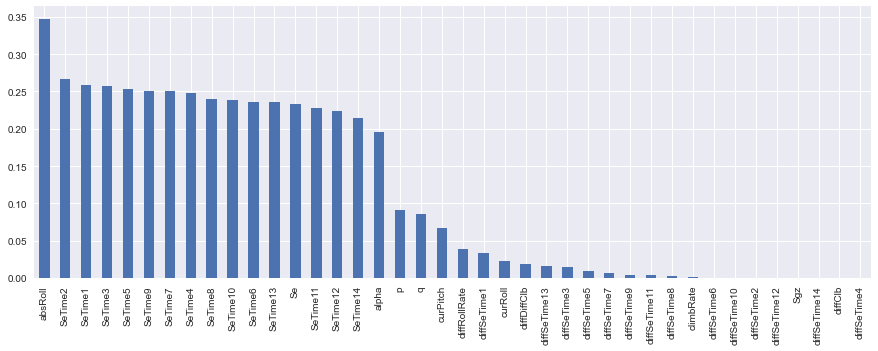

In [1049]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

#### Selecting Top 10 Features

In [1050]:
from sklearn.feature_selection import SelectKBest
## Selecting the top 20 percentile
selected_top_columns = SelectKBest(mutual_info_regression,k=10)
selected_top_columns.fit(X1_train, Y1_train)

SelectKBest(score_func=<function mutual_info_regression at 0x000002090AAD5D08>)

In [1051]:
selected_top_columns.get_support()

array([False, False, False, False, False, False,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [1052]:
X1_train.columns[selected_top_columns.get_support()]

Index(['absRoll', 'SeTime1', 'SeTime2', 'SeTime3', 'SeTime4', 'SeTime5',
       'SeTime6', 'SeTime7', 'SeTime10', 'SeTime14'],
      dtype='object')

In [1053]:
data = df[['absRoll', 'SeTime1', 'SeTime2', 'SeTime3', 'SeTime4', 'SeTime5',
       'SeTime6', 'SeTime7', 'SeTime10', 'SeTime14','goal']]

In [1054]:
data

absRoll  SeTime1  SeTime2  SeTime3  SeTime4  SeTime5  SeTime6  SeTime7  \
0          -11    0.032    0.032    0.032    0.032    0.032    0.032    0.032   
1          -12    0.034    0.034    0.034    0.034    0.034    0.034    0.034   
2          -11    0.034    0.034    0.034    0.034    0.034    0.034    0.034   
3          -10    0.033    0.033    0.033    0.033    0.033    0.033    0.033   
4          -11    0.030    0.030    0.030    0.030    0.030    0.030    0.030   
...        ...      ...      ...      ...      ...      ...      ...      ...   
12245       -8    0.019    0.019    0.019    0.019    0.019    0.019    0.019   
12246       -8    0.022    0.021    0.021    0.021    0.021    0.021    0.021   
12247       -7    0.022    0.022    0.022    0.022    0.022    0.022    0.022   
12248       -8    0.020    0.021    0.021    0.022    0.022    0.022    0.022   
12249       -9    0.020    0.020    0.020    0.020    0.020    0.020    0.020   

       SeTime10  SeTime14    goal  
0         0.032     0.032 -0.0009  
1         0.034     0.034 -0.0011  
2         0.034     0.034 -0.0012  
3         0.033     0.033 -0.0011  
4         0.030     0.032 -0.0008  
...         ...       ...     ...  
12245     0.019     0.019 -0.0007  
12246     0.021     0.021 -0.0008  
12247     0.021     0.021 -0.0007  
12248     0.022     0.022 -0.0006  
12249     0.020     0.020 -0.0004  

[12250 rows x 11 columns]

In [1055]:
data.corr()

absRoll   SeTime1   SeTime2   SeTime3   SeTime4   SeTime5  \
absRoll   1.000000 -0.348971 -0.345984 -0.345988 -0.344584 -0.344666   
SeTime1  -0.348971  1.000000  0.997235  0.997234  0.995418  0.995405   
SeTime2  -0.345984  0.997235  1.000000  0.999999  0.998872  0.998863   
SeTime3  -0.345988  0.997234  0.999999  1.000000  0.998873  0.998864   
SeTime4  -0.344584  0.995418  0.998872  0.998873  1.000000  0.999991   
SeTime5  -0.344666  0.995405  0.998863  0.998864  0.999991  1.000000   
SeTime6  -0.343702  0.993456  0.997156  0.997157  0.998699  0.998708   
SeTime7  -0.343764  0.993433  0.997142  0.997143  0.998685  0.998699   
SeTime10 -0.342814  0.987161  0.991045  0.991046  0.992777  0.992791   
SeTime14 -0.342081  0.978913  0.982792  0.982786  0.984605  0.984618   
goal      0.692896 -0.637057 -0.636969 -0.636983 -0.636824 -0.636874   

           SeTime6   SeTime7  SeTime10  SeTime14      goal  
absRoll  -0.343702 -0.343764 -0.342814 -0.342081  0.692896  
SeTime1   0.993456  0.993433  0.987161  0.978913 -0.637057  
SeTime2   0.997156  0.997142  0.991045  0.982792 -0.636969  
SeTime3   0.997157  0.997143  0.991046  0.982786 -0.636983  
SeTime4   0.998699  0.998685  0.992777  0.984605 -0.636824  
SeTime5   0.998708  0.998699  0.992791  0.984618 -0.636874  
SeTime6   1.000000  0.999990  0.994918  0.986905 -0.635144  
SeTime7   0.999990  1.000000  0.994928  0.986914 -0.635159  
SeTime10  0.994918  0.994928  1.000000  0.994011 -0.630068  
SeTime14  0.986905  0.986914  0.994011  1.000000 -0.624044  
goal     -0.635144 -0.635159 -0.630068 -0.624044  1.000000

In [1056]:
X1 = data.drop(['goal'], axis=1)
Y1 = data['goal']

In [1059]:
X1_train, X1_test,Y1_train,Y1_test = train_test_split(X1,Y1, test_size = 0.2, random_state= 2)
print(X1.shape, X1_train.shape, Y1_train.shape, X1_test.shape,Y1_test.shape)

(12250, 10) (9800, 10) (9800,) (2450, 10) (2450,)


In [1060]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled =  scaler.fit_transform(X1_test)

#### 1. Linear Regression

In [1061]:
model = LinearRegression()
model.fit(X1_train_scaled,Y1_train)

LinearRegression()

In [1062]:
# accuracy for prediction on training data
lrprediction = model.predict(X1_test_scaled)
print(lrprediction)

[-0.00042952 -0.00096171 -0.00145781 ... -0.00062691 -0.00151802
 -0.00065313]


In [1063]:
# R squared error
r2_lr = metrics.r2_score(Y1_test, lrprediction)

rms_lr = sqrt(metrics.mean_squared_error(Y1_test, lrprediction))

print("R squared error : ", r2_lr)

print('RMSE test : ', rms_lr)

R squared error :  0.6553648495986766
RMSE test :  0.0002397928317278053


#### 2. Decision Tree Regressor

In [1064]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree

DecisionTreeRegressor()

In [1065]:
dtree.fit(X1_train_scaled,Y1_train)

DecisionTreeRegressor()

In [1066]:
dtree_pred = dtree.predict(X1_test_scaled)

In [1067]:
# R squared error
r2_dtree = metrics.r2_score(Y1_test, dtree_pred)

rms_dtree = sqrt(metrics.mean_squared_error(Y1_test, dtree_pred))

print("R squared error : ", r2_dtree)

print('RMSE test : ', rms_dtree)

R squared error :  0.5243588884981102
RMSE test :  0.00028170600437974353


#### 3. RandomForrestRegressor

In [1068]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(X1_train_scaled, Y1_train)

RandomForestRegressor()

In [1069]:
rf_test = rf.predict(X1_test_scaled)
print(rf_test)

[-0.00046592 -0.00087603 -0.00155937 ... -0.00056395 -0.00147273
 -0.00055293]


In [1070]:
# R squared error
r2_rf = metrics.r2_score(Y1_test, rf_test)

rms_rf = sqrt(metrics.mean_squared_error(Y1_test, rf_test))

print("R squared error : ", r2_rf)

print('RMSE test : ', rms_rf)

R squared error :  0.6186637064941962
RMSE test :  0.00025223798107286416


#### 4. XGBoost Regressor

In [1071]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X1_train_scaled, Y1_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [1072]:
xgb_test = xgb.predict(X1_test_scaled)
print(xgb_test)

[-0.00051177 -0.00085324 -0.00140393 ... -0.00059503 -0.00149381
 -0.00063366]


In [1073]:
# R squared error
r2_xg = metrics.r2_score(Y1_test, xgb_test)

rms_xg = sqrt(metrics.mean_squared_error(Y1_test, xgb_test))

print("R squared error : ", r2_xg)

print('RMSE test : ', rms_xg)

R squared error :  0.6643709855661423
RMSE test :  0.00023663891202978552


In [1074]:
# NN
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.layers import Dropout

#### 5. LightGBM

In [1075]:
import lightgbm as lgb
lgb = lgb.LGBMRegressor()
lgb.fit(X1_train_scaled,Y1_train)
lgb_pred= lgb.predict(X1_test_scaled)

In [1076]:
# R squared error
r2_lgb = metrics.r2_score(Y1_test, lgb_pred)

rms_lgb = sqrt(metrics.mean_squared_error(Y1_test,lgb_pred))

print("R squared error : ", r2_lgb)

print('RMSE test : ', rms_lgb)

R squared error :  0.6623295546798993
RMSE test :  0.0002373574876205137


In [1028]:
parameters = {'boosting_type':['gbdt', 'dart','rf'],'n_estimators':[200,300,400],'min_child_samples':[20,40,60],'min_child_weight':[0.1,0.002,0.001],'learning_rate':[0.001,0.01,0.02]}

In [1029]:
grid_lgb = GridSearchCV(lgb, parameters, cv= None)
grid_lgb.fit(X1_train_scaled,Y1_train)

C:\Users\nsidd\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nsidd\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nsidd\Anaconda3\lib\site-packages\lightgbm\sklearn.py", line 743, in fit
    callbacks=callbacks)
  File "C:\Users\nsidd\Anaconda3\lib\site-packages\lightgbm\sklearn.py", line 600, in fit
    callbacks=callbacks)
  File "C:\Users\nsidd\Anaconda3\lib\site-packages\lightgbm\engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\nsidd\Anaconda3\lib\site-packages\lightgbm\basic.py", line 1716, in __init__
    ctypes.byref(self.handle)))
  File "C:\Users\nsidd\Anaconda3\lib\site-packages\lightgbm\basic.py", li

GridSearchCV(estimator=LGBMRegressor(),
             param_grid={'boosting_type': ['gbdt', 'dart', 'rf'],
                         'learning_rate': [0.001, 0.01, 0.02],
                         'min_child_samples': [20, 40, 60],
                         'min_child_weight': [0.1, 0.002, 0.001],
                         'n_estimators': [200, 300, 400]})

In [1030]:
grid_lgb.best_estimator_

LGBMRegressor(learning_rate=0.01, min_child_samples=60, min_child_weight=0.1,
              n_estimators=400)

In [1031]:
grid_lgb.best_score_

0.6747107467729162

In [1077]:
import lightgbm as lgb
grid_lgb = lgb.LGBMRegressor(boosting_type="gbdt",
 min_child_samples=60,
 learning_rate=0.01,                            
 min_child_weight= 0.1,
 n_estimators=400)

In [1078]:
grid_lgb.fit(X1_train_scaled,Y1_train)
grid_lgb

LGBMRegressor(learning_rate=0.01, min_child_samples=60, min_child_weight=0.1,
              n_estimators=400)

In [1079]:
pred_lgb= grid_lgb.predict(X1_test_scaled)
pred_lgb

array([-0.0005129 , -0.00090378, -0.00151108, ..., -0.00061316,
       -0.00146586, -0.00064016])

In [1080]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y1_test,pred_lgb)))
print("R2-Score LGB",metrics.r2_score(Y1_test, pred_lgb))

RMSE: 0.00023656925220068815
R2-Score LGB 0.6645685559352674


#### 6. Neural Network

In [1081]:
callback = EarlyStopping(monitor = "loss",patience = 5)

In [1083]:
model = Sequential()
model.add(Dense(units = 10, input_dim = 10, activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(units = 10, activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(units = 10, activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(units = 10, activation="tanh"))
model.add(Dense(1))
model.compile(loss = MeanSquaredError(reduction="auto", name="mean_squared_error"), optimizer = "adam", metrics= [RootMeanSquaredError()])
model.fit(X1_train_scaled, Y1_train,batch_size = 32, epochs = 100,callbacks=[callbacks],steps_per_epoch = 300)

Epoch 1/100
300/300 [==============================] - 7s 24ms/step - loss: 0.0121 - root_mean_squared_error: 0.1099
Epoch 2/100
300/300 [==============================] - 8s 26ms/step - loss: 4.5276e-04 - root_mean_squared_error: 0.0213
Epoch 3/100
300/300 [==============================] - 8s 28ms/step - loss: 1.2181e-04 - root_mean_squared_error: 0.0110
Epoch 4/100
300/300 [==============================] - 7s 23ms/step - loss: 4.4399e-05 - root_mean_squared_error: 0.0067
Epoch 5/100
300/300 [==============================] - 7s 22ms/step - loss: 2.1012e-05 - root_mean_squared_error: 0.0046: 2s - loss: 
Epoch 6/100
300/300 [==============================] - 6s 19ms/step - loss: 1.2549e-05 - root_mean_squared_error: 0.0035
Epoch 7/100
300/300 [==============================] - 6s 21ms/step - loss: 8.7098e-06 - root_mean_squared_error: 0.0030
Epoch 8/100
300/300 [==============================] - 7s 23ms/step - loss: 6.4310e-06 - root_mean_squared_error: 0.0025
Epoch 9/100
300/300 [==

In [1084]:
model.evaluate(X1_test_scaled, Y1_test, batch_size=10, steps=15)

15/15 [==============================] - 1s 43ms/step - loss: 6.1279e-08 - root_mean_squared_error: 2.4755e-04


[6.127900320507251e-08, 0.00024754598]

#### 7. Extra Trees Regressor

In [1148]:
from sklearn.ensemble import ExtraTreesRegressor
ext1=ExtraTreesRegressor(n_estimators = 200, min_samples_leaf = 5,min_samples_split=4)
ext1.fit(X1_train_scaled,Y1_train)

ExtraTreesRegressor(min_samples_leaf=5, min_samples_split=4, n_estimators=200)

In [1149]:
ext1_pred = ext1.predict(X1_test_scaled)

In [1150]:
print("RMSE ExtraTreesRegressor",np.sqrt(metrics.mean_squared_error(Y1_test,ext1_pred)))
print("R2-Score Extra Trees Regressor",metrics.r2_score(Y1_test, ext1_pred))

RMSE ExtraTreesRegressor 0.0002363659334467416
R2-Score Extra Trees Regressor 0.6651448793219754


#### Model Performance Scores

|Model Name|R2- Squared|RMSE|
|----------|--------------|------|
|1. Linear Regression|0.6553|0.000239|
|2. Decision Tree|0.5243|0.000281|
|3. Random Forrest|0.6186|0.000252|
|4. XGBoost|0.6643|0.000236|
|5. Light GBM|0.6645|0.000236|
|6. Neural Network|6.127e-08|0.000247|
|7. ExtraTreesRegressor|0.6651|0.000236|

##### Model Performance Summary

#### Model Performance:- Part 1

|Model Name|R2- Squared|RMSE|                
|----------|--------------|------|
|1. Linear Regression|0.8097|0.000178|
|2. Decision Tree|0.6882|0.000228|
|3. Random Forrest|0.8327|0.000167|
|4. XGBoost|0.8221|0.0001722|
|5. ***LightGBM***|***0.8398***|***0.000163***|
|6. Neural Network|4.24e-08(MSE)|0.000205|
|7. ExtraTreesRegressor|0.8298|0.000168|

#### Model Performance:- Part 2

|Model Name|R2- Squared|RMSE|
|----------|--------------|------|
|Linear Regression|-3.8331|0.000897|
|Decision Tree|0.5643|0.000269|
|Random Forrest|0.8343|0.000166|
|XGBoost|0.82211|0.0001722|
|***Light GBM***|***0.8441***|***0.000161***|
|ExtraTreesRegressor|0.8288|0.000168|

#### Model Performance:- Part 3

|Model Name|R2- Squared|RMSE|
|----------|--------------|------|
|1. Linear Regression|0.6553|0.000239|
|2. Decision Tree|0.5243|0.000281|
|3. Random Forrest|0.6186|0.000252|
|4. XGBoost|0.6643|0.000236|
|5. Light GBM|0.6645|0.000236|
|6. Neural Network|6.127e-08|0.000247|
|7. ***ExtraTreesRegressor***|***0.6651***|***0.000236***|

#### By comparing the results of all 3 Methods, Light GBM performed well with R-squared value of 84.41, RMSE of 0.000161

#### Lower the RMSE Value and Higher the R-Square value results best model.

#### Sample Goal Predictions

In [1173]:
lgb_pred=pd.DataFrame(lgb_pred)
lgb_pred[:5]

0
0 -0.000544
1 -0.000710
2 -0.001101
3 -0.000928
4 -0.000473

In [1174]:
lgb_pred.shape

(2450, 1)

#### Thank You
#### END